In [36]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator
import warnings
warnings.filterwarnings('ignore')

## 1. Data Collection and Exploration

In [37]:
# loading the dataset
df = pd.read_csv('../data/Mall_Customers.csv')

In [38]:
# Dataset overview
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (200, 5)

First 5 rows:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [39]:
print("Last 5 rows:")
df.tail()

Last 5 rows:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [40]:
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [41]:
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [42]:
print("Duplicate Rows:", df.duplicated().sum())

Duplicate Rows: 0


In [43]:
print("Statistical Summary:")
df.describe()

Statistical Summary:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## 2. Data Preprocessing and Feature Selection

In [45]:
# Select features for clustering
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = df[features].copy()

In [46]:
print("Selected Features:")
print(X.head())

Selected Features:
   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40


In [52]:
# Feature scaling 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=features)

## 3. Determining Optimal Number of Clusters

In [53]:
# Method 1: Elbow Method (WCSS)
wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

print("WCSS values:", wcss)


WCSS values: [399.99999999999994, 269.69101219276394, 157.70400815035947, 108.92131661364357, 65.56840815571681, 55.057348270386, 44.86475569922557, 37.228187677585886, 32.39226763033116, 29.981897788243696]


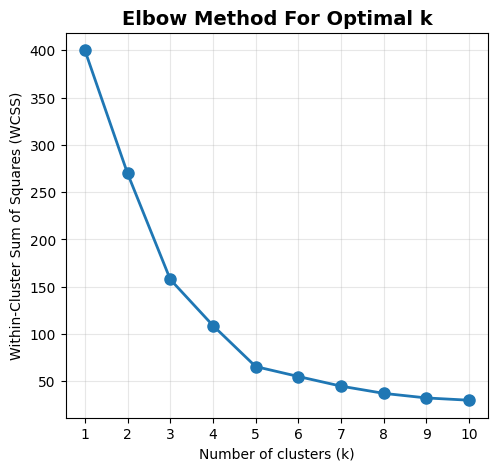

In [54]:
# Plot Elbow Method
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K_range, wcss, marker='o', linewidth=2, markersize=8)
plt.title('Elbow Method For Optimal k', fontsize=14, fontweight='bold')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(K_range)
plt.grid(True, alpha=0.3)

## Using the elbow method to find the optimal number of clusters we can see that the elbow point is at k=5

In [56]:
# Method 2: Silhouette Score
silhouette_scores = []
K_range_silhouette = range(2, 11)  # Silhouette score needs at least 2 clusters

for k in K_range_silhouette:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

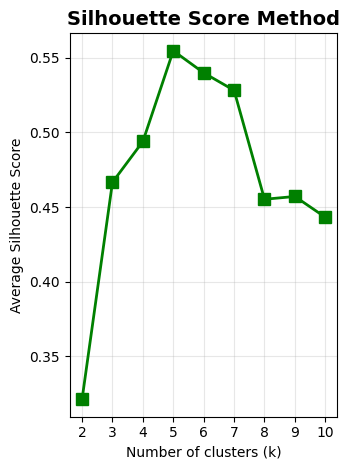

In [58]:
plt.subplot(1, 2, 2)
plt.plot(K_range_silhouette, silhouette_scores, marker='s', linewidth=2, markersize=8, color='green')
plt.title('Silhouette Score Method', fontsize=14, fontweight='bold')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.xticks(K_range_silhouette)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Using Silhouette Score Method we also can see that the optimal number of clusters is 5, as the silhouette score reaches its peak at k=5. This confirms the result obtained from the Elbow Method.

In [59]:
# Method 3: KneeLocator for automatic elbow detection
kl = KneeLocator(K_range, wcss, curve="convex", direction="decreasing")
optimal_k_elbow = kl.elbow

# Find optimal k from silhouette score
optimal_k_silhouette = K_range_silhouette[np.argmax(silhouette_scores)]

print(f"Optimal k using Elbow Method (KneeLocator): {optimal_k_elbow}")
print(f"Optimal k using Silhouette Score: {optimal_k_silhouette}")
print(f"Max Silhouette Score: {max(silhouette_scores):.3f}")

Optimal k using Elbow Method (KneeLocator): 5
Optimal k using Silhouette Score: 5
Max Silhouette Score: 0.555


## 4. Model Training and Clustering

In [60]:
# Use the optimal number of clusters 
optimal_k = 5
print(f"Using k = {optimal_k} clusters")

Using k = 5 clusters


In [62]:
# Train the  model
kmean_model = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
cluster_labels = kmean_model.fit_predict(X)

In [63]:
# Add cluster labels to the original dataframe
df['Cluster'] = cluster_labels

In [64]:
print("Cluster Labels:", np.unique(cluster_labels))
print("Cluster Distribution:")
print(df['Cluster'].value_counts().sort_index())

Cluster Labels: [0 1 2 3 4]
Cluster Distribution:
Cluster
0    81
1    39
2    22
3    35
4    23
Name: count, dtype: int64


## 5. Cluster Visualization and Analysis

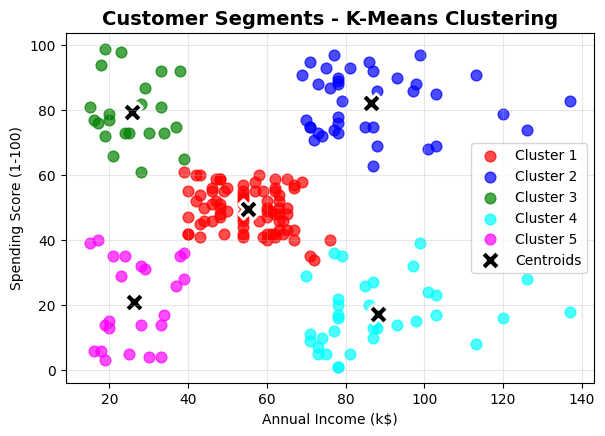

In [67]:
# Enhanced cluster visualization
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
colors = ['red', 'blue', 'green', 'cyan', 'magenta', 'yellow', 'orange']

for i in range(optimal_k):
    cluster_data = X[cluster_labels == i]
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], 
                s=60, c=colors[i], label=f'Cluster {i+1}', alpha=0.7)

# Plot centroids
plt.scatter(kmean_model.cluster_centers_[:, 0], kmean_model.cluster_centers_[:, 1], 
            s=200, c='black', marker='X', label='Centroids', edgecolor='white', linewidth=2)

plt.title('Customer Segments - K-Means Clustering', fontsize=14, fontweight='bold')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True, alpha=0.3)

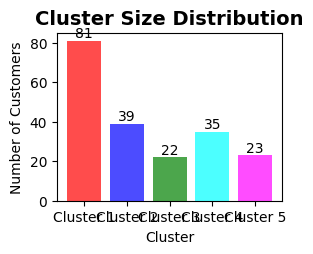

In [68]:
# Cluster size distribution
plt.subplot(2, 2, 2)
cluster_counts = df['Cluster'].value_counts().sort_index()
bars = plt.bar(range(optimal_k), cluster_counts.values, color=colors[:optimal_k], alpha=0.7)
plt.title('Cluster Size Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(range(optimal_k), [f'Cluster {i+1}' for i in range(optimal_k)])

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom')


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4')])

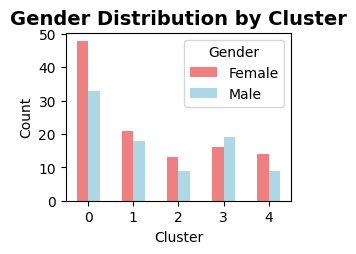

In [69]:
# Gender distribution by cluster
plt.subplot(2, 2, 3)
gender_cluster = pd.crosstab(df['Cluster'], df['Gender'])
gender_cluster.plot(kind='bar', ax=plt.gca(), color=['lightcoral', 'lightblue'])
plt.title('Gender Distribution by Cluster', fontsize=14, fontweight='bold')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.xticks(rotation=0)

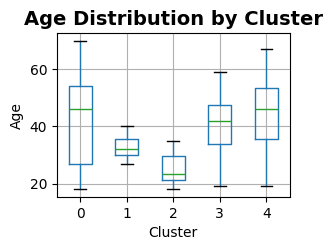

In [71]:
# Age distribution by cluster
plt.subplot(2, 2, 4)
df.boxplot(column='Age', by='Cluster', ax=plt.gca())
plt.title('Age Distribution by Cluster', fontsize=14, fontweight='bold')
plt.suptitle('')  # Remove default title
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()

## 6. Cluster Profiling and Business Insights

In [72]:
# Detailed cluster analysis
print("=== CLUSTER PROFILING ===\n")

cluster_profiles = df.groupby('Cluster').agg({
    'Age': ['mean', 'std'],
    'Annual Income (k$)': ['mean', 'std'],
    'Spending Score (1-100)': ['mean', 'std'],
    'Gender': lambda x: x.mode()[0]  # Most common gender
}).round(2)

cluster_profiles.columns = ['Age_Mean', 'Age_Std', 'Income_Mean', 'Income_Std', 
                           'Spending_Mean', 'Spending_Std', 'Dominant_Gender']

print("Cluster Characteristics:")
print(cluster_profiles)

=== CLUSTER PROFILING ===

Cluster Characteristics:
         Age_Mean  Age_Std  Income_Mean  Income_Std  Spending_Mean  \
Cluster                                                              
0           42.72    16.45        55.30        8.99          49.52   
1           32.69     3.73        86.54       16.31          82.13   
2           25.27     5.26        25.73        7.57          79.36   
3           41.11    11.34        88.20       16.40          17.11   
4           45.22    13.23        26.30        7.89          20.91   

         Spending_Std Dominant_Gender  
Cluster                                
0                6.53          Female  
1                9.36          Female  
2               10.50          Female  
3                9.95            Male  
4               13.02          Female  


In [73]:
# Business insights for each cluster
cluster_insights = {
    0: "Conservative Spenders - Low income, low spending",
    1: "High Earners, Low Spenders - High income, conservative spending",
    2: "Average Customers - Moderate income and spending",
    3: "Target Customers - Moderate income, high spending",
    4: "VIP Customers - High income, high spending"
}

print("\n=== BUSINESS INSIGHTS ===")
for cluster_id in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster_id]
    print(f"\nCluster {cluster_id + 1} ({len(cluster_data)} customers):")
    print(f"  - Average Age: {cluster_data['Age'].mean():.1f} years")
    print(f"  - Average Income: ${cluster_data['Annual Income (k$)'].mean():.1f}k")
    print(f"  - Average Spending Score: {cluster_data['Spending Score (1-100)'].mean():.1f}/100")
    print(f"  - Gender Split: {cluster_data['Gender'].value_counts().to_dict()}")
    
    # Business interpretation
    income_avg = cluster_data['Annual Income (k$)'].mean()
    spending_avg = cluster_data['Spending Score (1-100)'].mean()
    
    if income_avg < 40 and spending_avg < 40:
        insight = "Budget-Conscious Customers - Focus on value propositions and discounts"
    elif income_avg > 70 and spending_avg < 40:
        insight = "High Earners, Low Spenders - Target with premium products and exclusive offers"
    elif income_avg < 60 and spending_avg > 60:
        insight = "Enthusiastic Spenders - Great for promotions and new product launches"
    elif income_avg > 60 and spending_avg > 60:
        insight = "Premium Customers - Focus on luxury items and personalized service"
    else:
        insight = "Balanced Customers - Standard marketing approach"
    
    print(f"  - Strategy: {insight}")



=== BUSINESS INSIGHTS ===

Cluster 1 (81 customers):
  - Average Age: 42.7 years
  - Average Income: $55.3k
  - Average Spending Score: 49.5/100
  - Gender Split: {'Female': 48, 'Male': 33}
  - Strategy: Balanced Customers - Standard marketing approach

Cluster 2 (39 customers):
  - Average Age: 32.7 years
  - Average Income: $86.5k
  - Average Spending Score: 82.1/100
  - Gender Split: {'Female': 21, 'Male': 18}
  - Strategy: Premium Customers - Focus on luxury items and personalized service

Cluster 3 (22 customers):
  - Average Age: 25.3 years
  - Average Income: $25.7k
  - Average Spending Score: 79.4/100
  - Gender Split: {'Female': 13, 'Male': 9}
  - Strategy: Enthusiastic Spenders - Great for promotions and new product launches

Cluster 4 (35 customers):
  - Average Age: 41.1 years
  - Average Income: $88.2k
  - Average Spending Score: 17.1/100
  - Gender Split: {'Male': 19, 'Female': 16}
  - Strategy: High Earners, Low Spenders - Target with premium products and exclusive offe

## 7. Model Validation

Final Model Silhouette Score: 0.554


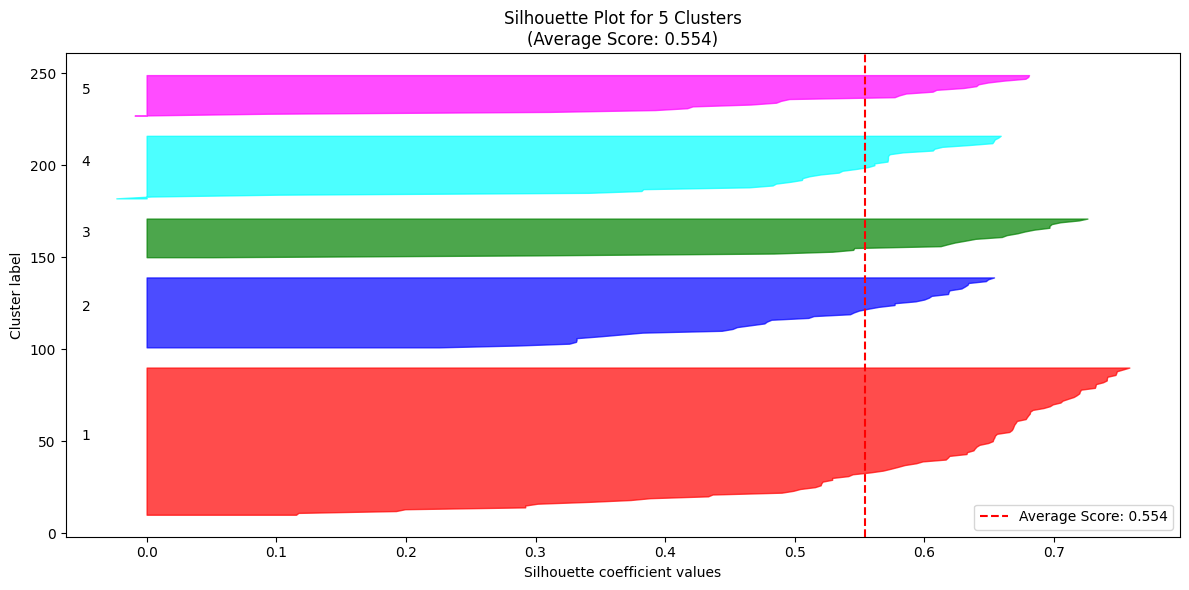

In [74]:
# Calculate silhouette score for the final model
final_silhouette_score = silhouette_score(X, cluster_labels)
print(f"Final Model Silhouette Score: {final_silhouette_score:.3f}")

# Silhouette analysis for each cluster
sample_silhouette_values = silhouette_samples(X, cluster_labels)

plt.figure(figsize=(12, 6))

y_lower = 10
for i in range(optimal_k):
    cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    cluster_silhouette_values.sort()
    
    size_cluster_i = cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = colors[i]
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i+1))
    y_lower = y_upper + 10

plt.xlabel('Silhouette coefficient values')
plt.ylabel('Cluster label')
plt.title(f'Silhouette Plot for {optimal_k} Clusters\n(Average Score: {final_silhouette_score:.3f})')

# Add vertical line for average silhouette score
plt.axvline(x=final_silhouette_score, color="red", linestyle="--", 
           label=f'Average Score: {final_silhouette_score:.3f}')
plt.legend()

plt.tight_layout()
plt.show()


In [75]:
# Export results
output_df = df.copy()
print("\nFinal dataset with cluster assignments:")
print(output_df.head(10))


Final dataset with cluster assignments:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   
5           6  Female   22                  17                      76   
6           7  Female   35                  18                       6   
7           8  Female   23                  18                      94   
8           9    Male   64                  19                       3   
9          10  Female   30                  19                      72   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  
5        2  
6        4  
7        2  
8        4  
9        2  


In [76]:
output_df.to_csv('../data/customer_segments.csv', index=False)
print("Results saved to '../data/customer_segments.csv'")

Results saved to '../data/customer_segments.csv'


In [77]:
print("\n=== ANALYSIS COMPLETE ===")
print(f"Successfully segmented {len(df)} customers into {optimal_k} distinct clusters!")


=== ANALYSIS COMPLETE ===
Successfully segmented 200 customers into 5 distinct clusters!
